In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\King\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [2]:
feverData  = pd.read_csv('Fever.csv')
feverData.head() 

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [3]:
feverData.shape

(36, 4)

In [4]:
feverData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [5]:
feverData.describe()

A          B  Volunteer     Relief
count  36.000000  36.000000  36.000000  36.000000
mean    2.000000   2.000000   2.500000   7.183333
std     0.828079   0.828079   1.133893   3.272090
min     1.000000   1.000000   1.000000   2.300000
25%     1.000000   1.000000   1.750000   4.675000
50%     2.000000   2.000000   2.500000   6.000000
75%     3.000000   3.000000   3.250000   9.325000
max     3.000000   3.000000   4.000000  13.500000

In [6]:
feverData.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

In [3]:
import sweetviz as sv # importing sweetviz
advert_report = sv.analyze(feverData) #analyzing the dataset
advert_report.show_html('EDA_feverData_sweetviz.html') #display the report

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!
Report EDA_feverData_sweetviz.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [4]:
from pandas_profiling import ProfileReport
design_report = ProfileReport(feverData)
design_report.to_file(output_file='EDA_feverData_pandas_profiling.html')

## Problem 1:

#### 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually.

For valiable 'A' \
$H_0$ : All the three means ($\mu$1,$\mu$2,$\mu$3) of 'three' levels (1,2,3) with respect to ingredient variable A is equal. \
$H_1$ : At least one of the three means ($\mu$1,$\mu$2,$\mu$3) of 'three' levels (1,2,3) with respect to ingredient variable A is unequal.

* $H_0$: $\mu$1 = $\mu$2 = $\mu$3
* $H_A$: means are not edual


For variable 'B' \
$H_0$ : All the three means ($\mu$1,$\mu$2,$\mu$3) of 'three' levels (1,2,3) with respect to ingredient variable B is equal. \
$H_1$ : At least one of the three means ($\mu$1,$\mu$2,$\mu$3) of 'three' levels (1,2,3) with respect to ingredient variable B is unequal.

* $H_0$: $\mu$1 = $\mu$2 = $\mu$3
* $H_A$: means are not edual

#### 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [7]:
formula = 'Relief  ~ C(A)'
model = ols(formula, feverData).fit()
aov_table = anova_lm(model)
print(aov_table)
print('\nBased on one way ANOVA result above PR(>F) = 4.578242e-07. this indicate \'p\' value is less than the significance level.'+
      '\nWe can reject the null hypothesis and states that \'at least one of the three means\' ( 𝜇 1, 𝜇 2, 𝜇 3) of \nthree levels (1,2,3) with respect to ingredient variable A is unequal.')

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN

Based on one way ANOVA result above PR(>F) = 4.578242e-07. this indicate 'p' value is less than the significance level.
We can reject the null hypothesis and states that 'at least one of the three means' ( 𝜇 1, 𝜇 2, 𝜇 3) of 
three levels (1,2,3) with respect to ingredient variable A is unequal.


#### 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [8]:
formula = 'Relief  ~ C(B)'
model = ols(formula, feverData).fit()
aov_table = anova_lm(model)
print(aov_table)
print('\nBased on one way ANOVA result above PR(>F) = 0.00135. this indicate \'p\' value is less than the significance level.'+
      '\nWe can reject the null hypothesis and states that \'at least one of the three means\' ( 𝜇 1, 𝜇 2, 𝜇 3) of \nthree levels (1,2,3) with respect to ingredient variable B is unequal.')

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN

Based on one way ANOVA result above PR(>F) = 0.00135. this indicate 'p' value is less than the significance level.
We can reject the null hypothesis and states that 'at least one of the three means' ( 𝜇 1, 𝜇 2, 𝜇 3) of 
three levels (1,2,3) with respect to ingredient variable B is unequal.


#### 1.4) Analyse the effects of one variable on another with the help of an interaction plot. What is an interaction between two treatments? [hint: use the ‘pointplot’ function from the ‘seaborn’ graphical subroutine in Python]

<AxesSubplot:xlabel='A', ylabel='Relief'>

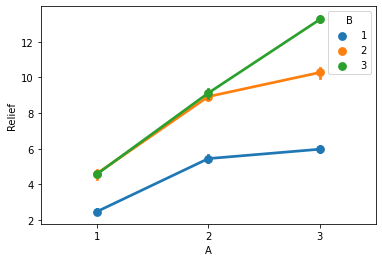

In [3]:
sns.pointplot(x='A', y='Relief',hue='B',data=feverData)

<AxesSubplot:xlabel='B', ylabel='Relief'>

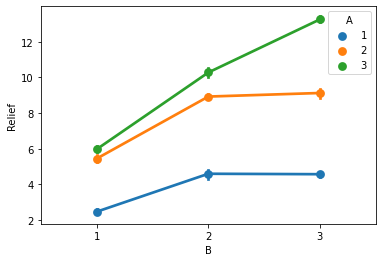

In [4]:
sns.pointplot(x='B', y='Relief',hue='A', data=feverData)

#### 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) and state your results.

In [11]:
model=ols('Relief ~ C(A) + C(B) + C(A):C(B)',data=feverData).fit()
aov_table=anova_lm(model,type=2)
print(aov_table)
print("\nAs two different ingredients A and B interaction is 6.972083e-17 which is less than 0.05.")
print("There seems to be statistical interaction")

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN

As two different ingredients A and B interaction is 6.972083e-17 which is less than 0.05.
There seems to be statistical interaction


#### 1.6) Mention the business implications of performing ANOVA for this particular case study.

1. It seems type-3 of either variable A or variable B is most effective providing relief compare to type-1 or type -2 of either variable A or variable B
1. It seems type-2 of either variable A or variable B is less effective providing relief compare to type-3 but more effective than type-1 of either variable A or variable B
1. It seems type-1 of either variable A or variable B is least effective providing relief compare to type-2 or type-3 of either variable A or variable B

# Solution Pending

#### 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

In [121]:
edu_data = pd.read_csv('Education+-+Post+12th+Standard.csv')
edu_data.head().T

0                   1               2  \
Names        Abilene Christian University  Adelphi University  Adrian College   
Apps                                 1660                2186            1428   
Accept                               1232                1924            1097   
Enroll                                721                 512             336   
Top10perc                              23                  16              22   
Top25perc                              52                  29              50   
F.Undergrad                          2885                2683            1036   
P.Undergrad                           537                1227              99   
Outstate                             7440               12280           11250   
Room.Board                           3300                6450            3750   
Books                                 450                 750             400   
Personal                             2200                1500            1165   
PhD                                    70                  29              53   
Terminal                               78                  30              66   
S.F.Ratio                            18.1                12.2            12.9   
perc.alumni                            12                  16              30   
Expend                               7041               10527            8735   
Grad.Rate                              60                  56              54   

                               3                          4  
Names        Agnes Scott College  Alaska Pacific University  
Apps                         417                        193  
Accept                       349                        146  
Enroll                       137                         55  
Top10perc                     60                         16  
Top25perc                     89                         44  
F.Undergrad                  510                        249  
P.Undergrad                   63                        869  
Outstate                   12960                       7560  
Room.Board                  5450                       4120  
Books                        450                        800  
Personal                     875                       1500  
PhD                           92                         76  
Terminal                      97                         72  
S.F.Ratio                    7.7                       11.9  
perc.alumni                   37                          2  
Expend                     19016                      10922  
Grad.Rate                     59                         15

### Univariate analysis

In [22]:
edu_data.shape # see the shape of the data

(777, 18)

In [23]:
edu_data.duplicated().sum() ##Identify duplicates records in the data

0

In [27]:
edu_data.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [25]:
edu_data.info() # To see the data type of each of the variable, number of values entered in each of the variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [28]:
edu_data.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

0

Names   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0    False  False   False   False      False      False        False   
1    False  False   False   False      False      False        False   
2    False  False   False   False      False      False        False   
3    False  False   False   False      False      False        False   
4    False  False   False   False      False      False        False   
..     ...    ...     ...     ...        ...        ...          ...   
772  False  False   False   False      False      False        False   
773  False  False   False   False      False      False        False   
774  False  False   False   False      False      False        False   
775  False  False   False   False      False      False        False   
776  False  False   False   False      False      False        False   

     P.Undergrad  Outstate  Room.Board  Books  Personal    PhD  Terminal  \
0          False     False       False  False     False  False     False   
1          False     False       False  False     False  False     False   
2          False     False       False  False     False  False     False   
3          False     False       False  False     False  False     False   
4          False     False       False  False     False  False     False   
..           ...       ...         ...    ...       ...    ...       ...   
772        False     False       False  False     False  False     False   
773        False     False       False  False     False  False     False   
774        False     False       False  False     False  False     False   
775        False     False       False  False     False  False     False   
776        False     False       False  False     False  False     False   

     S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        False        False   False      False  
1        False        False   False      False  
2        False        False   False      False  
3        False        False   False      False  
4        False        False   False      False  
..         ...          ...     ...        ...  
772      False        False   False      False  
773      False        False   False      False  
774      False        False   False      False  
775      False        False   False      False  
776      False        False   False      False  

[777 rows x 18 columns]

In [8]:
print(edu_data.var()) # the output brief's regarding how much was the data dispersion .

Apps           1.497846e+07
Accept         6.007960e+06
Enroll         8.633684e+05
Top10perc      3.111825e+02
Top25perc      3.922292e+02
F.Undergrad    2.352658e+07
P.Undergrad    2.317799e+06
Outstate       1.618466e+07
Room.Board     1.202743e+06
Books          2.725978e+04
Personal       4.584258e+05
PhD            2.666086e+02
Terminal       2.167478e+02
S.F.Ratio      1.566853e+01
perc.alumni    1.535567e+02
Expend         2.726687e+07
Grad.Rate      2.950737e+02
dtype: float64


In [9]:
print(edu_data.std()) # the output brief's regarding how much was the data deviated away from the mean .

Apps           3870.201484
Accept         2451.113971
Enroll          929.176190
Top10perc        17.640364
Top25perc        19.804778
F.Undergrad    4850.420531
P.Undergrad    1522.431887
Outstate       4023.016484
Room.Board     1096.696416
Books           165.105360
Personal        677.071454
PhD              16.328155
Terminal         14.722359
S.F.Ratio         3.958349
perc.alumni      12.391801
Expend         5221.768440
Grad.Rate        17.177710
dtype: float64


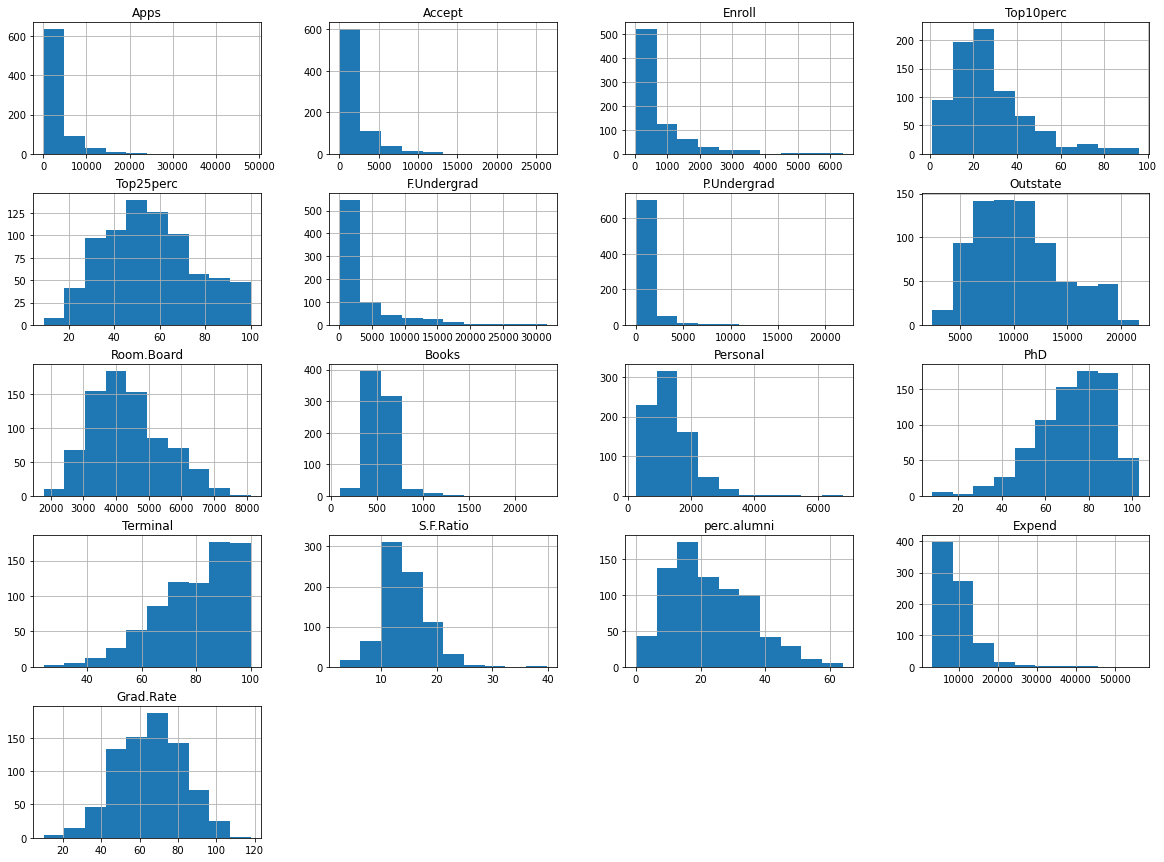

In [10]:
edu_data.hist(figsize=(20,15));

C:\Users\King\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'Abilene Christian University'

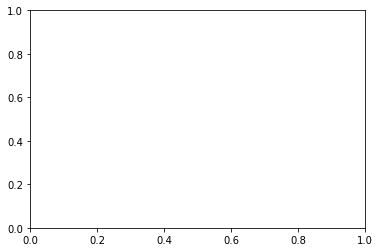

In [11]:
sns.distplot(edu_data, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

In [ ]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(edu_data)
#display the report
# advert_report.show_html('EDA_eduData_sweetviz.html')

In [ ]:
from pandas_profiling import ProfileReport
design_report = ProfileReport(edu_data)
# design_report.to_file(output_file='EDA_eduData_sweetviz_pandas_profiling.html')

### Bivariate analysis

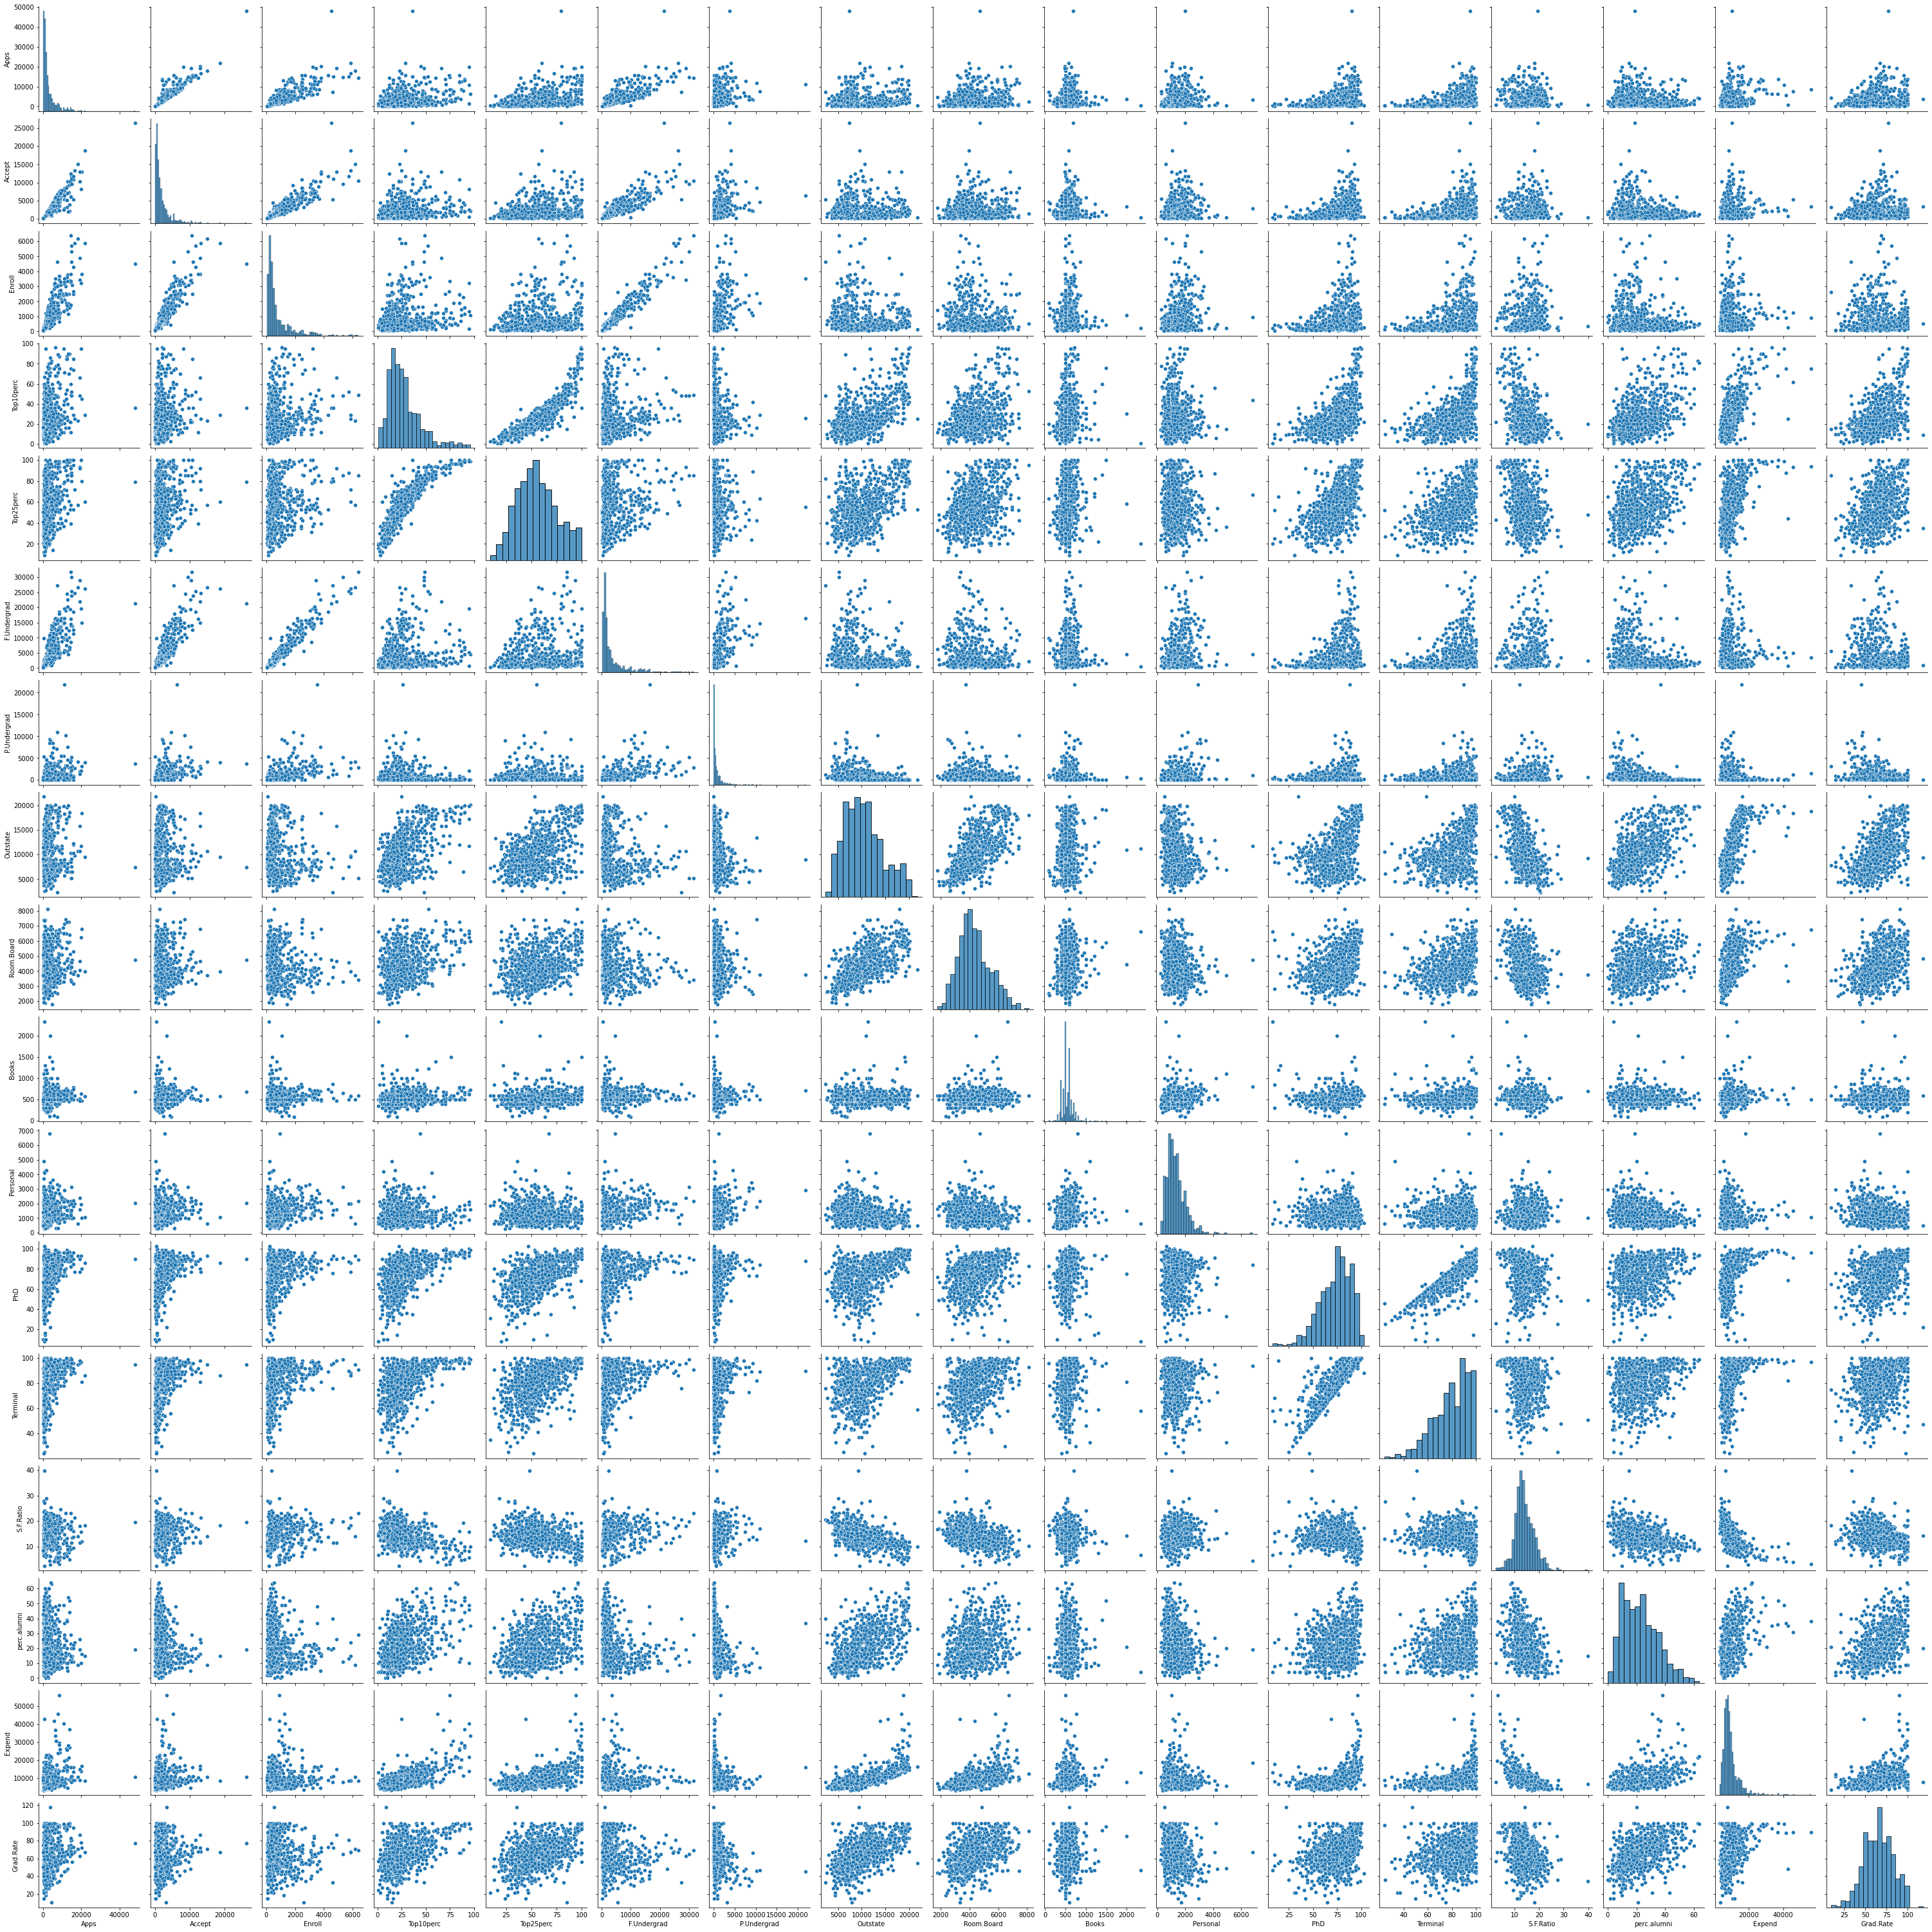

In [24]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = edu_data)
plt.show()

In [26]:
edu_data.cov()

Apps        Accept        Enroll     Top10perc  \
Apps         1.497846e+07  8.949860e+06  3.045256e+06  23132.773138   
Accept       8.949860e+06  6.007960e+06  2.076268e+06   8321.124872   
Enroll       3.045256e+06  2.076268e+06  8.633684e+05   2971.583415   
Top10perc    2.313277e+04  8.321125e+03  2.971583e+03    311.182456   
Top25perc    2.695266e+04  1.201340e+04  4.172592e+03    311.630480   
F.Undergrad  1.528970e+07  1.039358e+07  4.347530e+06  12089.113681   
P.Undergrad  2.346620e+06  1.646670e+06  7.257907e+05  -2829.474981   
Outstate     7.809704e+05 -2.539623e+05 -5.811885e+05  39907.179832   
Room.Board   7.000729e+05  2.443471e+05 -4.099706e+04   7186.705605   
Books        8.470375e+04  4.594281e+04  1.729120e+04    346.177405   
Personal     4.683468e+05  3.335566e+05  1.767380e+05  -1114.551186   
PhD          2.468943e+04  1.423820e+04  5.028961e+03    153.184870   
Terminal     2.105307e+04  1.218209e+04  4.217086e+03    127.551581   
S.F.Ratio    1.465061e+03  1.709838e+03  8.726848e+02    -26.874525   
perc.alumni -4.327122e+03 -4.859487e+03 -2.081694e+03     99.567208   
Expend       5.246171e+06  1.596272e+06  3.113454e+05  60879.310196   
Grad.Rate    9.756422e+03  2.834163e+03 -3.565880e+02    149.992164   

                Top25perc   F.Undergrad   P.Undergrad      Outstate  \
Apps         26952.663479  1.528970e+07  2.346620e+06  7.809704e+05   
Accept       12013.404757  1.039358e+07  1.646670e+06 -2.539623e+05   
Enroll        4172.592435  4.347530e+06  7.257907e+05 -5.811885e+05   
Top10perc      311.630480  1.208911e+04 -2.829475e+03  3.990718e+04   
Top25perc      392.229216  1.915895e+04 -1.615412e+03  3.899243e+04   
F.Undergrad  19158.952782  2.352658e+07  4.212910e+06 -4.209843e+06   
P.Undergrad  -1615.412144  4.212910e+06  2.317799e+06 -1.552704e+06   
Outstate     38992.427500 -4.209843e+06 -1.552704e+06  1.618466e+07   
Room.Board    7199.903568 -3.664582e+05 -1.023919e+05  2.886597e+06   
Books          377.759266  9.253576e+04  2.041045e+04  2.580824e+04   
Personal     -1083.605065  1.041709e+06  3.297324e+05 -8.146737e+05   
PhD            176.518449  2.521178e+04  3.706756e+03  2.515752e+04   
Terminal       153.002612  2.142424e+04  3.180597e+03  2.416415e+04   
S.F.Ratio      -23.097199  5.370209e+03  1.401303e+03 -8.835254e+03   
perc.alumni    102.550946 -1.379193e+04 -5.297337e+03  2.822955e+04   
Expend       54546.483305  4.724040e+05 -6.643512e+05  1.413324e+07   
Grad.Rate      162.371398 -6.563308e+03 -6.721062e+03  3.947968e+04   

               Room.Board         Books      Personal           PhD  \
Apps         7.000729e+05  84703.752639  4.683468e+05  24689.433666   
Accept       2.443471e+05  45942.807867  3.335566e+05  14238.201489   
Enroll      -4.099706e+04  17291.199742  1.767380e+05   5028.961166   
Top10perc    7.186706e+03    346.177405 -1.114551e+03    153.184870   
Top25perc    7.199904e+03    377.759266 -1.083605e+03    176.518449   
F.Undergrad -3.664582e+05  92535.764728  1.041709e+06  25211.784197   
P.Undergrad -1.023919e+05  20410.446674  3.297324e+05   3706.756219   
Outstate     2.886597e+06  25808.242145 -8.146737e+05  25157.515051   
Room.Board   1.202743e+06  23170.313390 -1.480838e+05   5895.034749   
Books        2.317031e+04  27259.779946  2.004303e+04     72.534242   
Personal    -1.480838e+05  20043.025650  4.584258e+05   -120.898783   
PhD          5.895035e+03     72.534242 -1.208988e+02    266.608636   
Terminal     6.047300e+03    242.963918 -3.051542e+02    204.231332   
S.F.Ratio   -1.574206e+03    -20.867207  3.654158e+02     -8.436492   
perc.alumni  3.701431e+03    -82.263132 -2.399311e+03     50.383230   
Expend       2.873308e+06  96912.580326 -3.460978e+05  36898.058233   
Grad.Rate    8.005360e+03      3.008837 -3.132615e+03     85.557109   

                 Terminal     S.F.Ratio   perc.alumni        Expend  \
Apps         21053.067602   1465.060576  -4327.122381  5.246171e+06   
Accept       12182.093828   1709.838189  -

In [27]:
edu_data.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

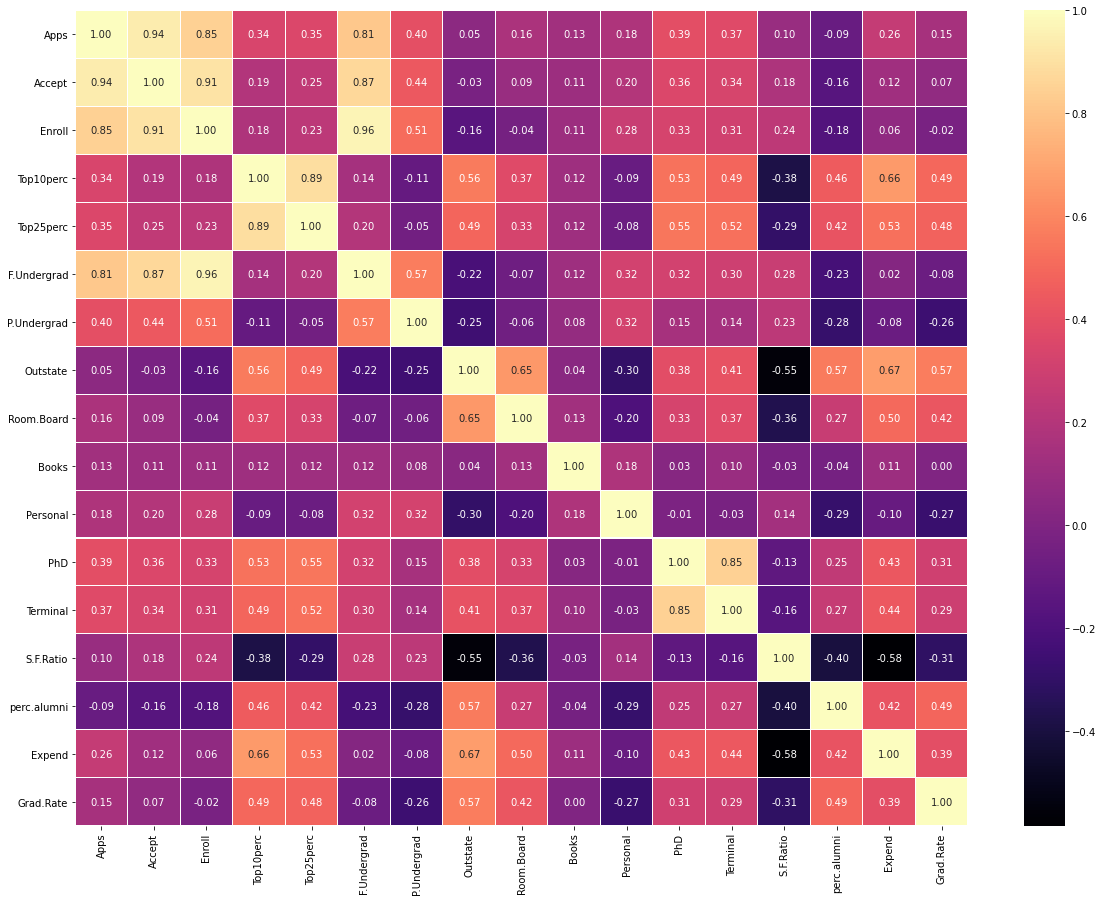

In [28]:
fig,ax = plt.subplots(figsize=(20, 15))   
sns.heatmap(edu_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

<AxesSubplot:>

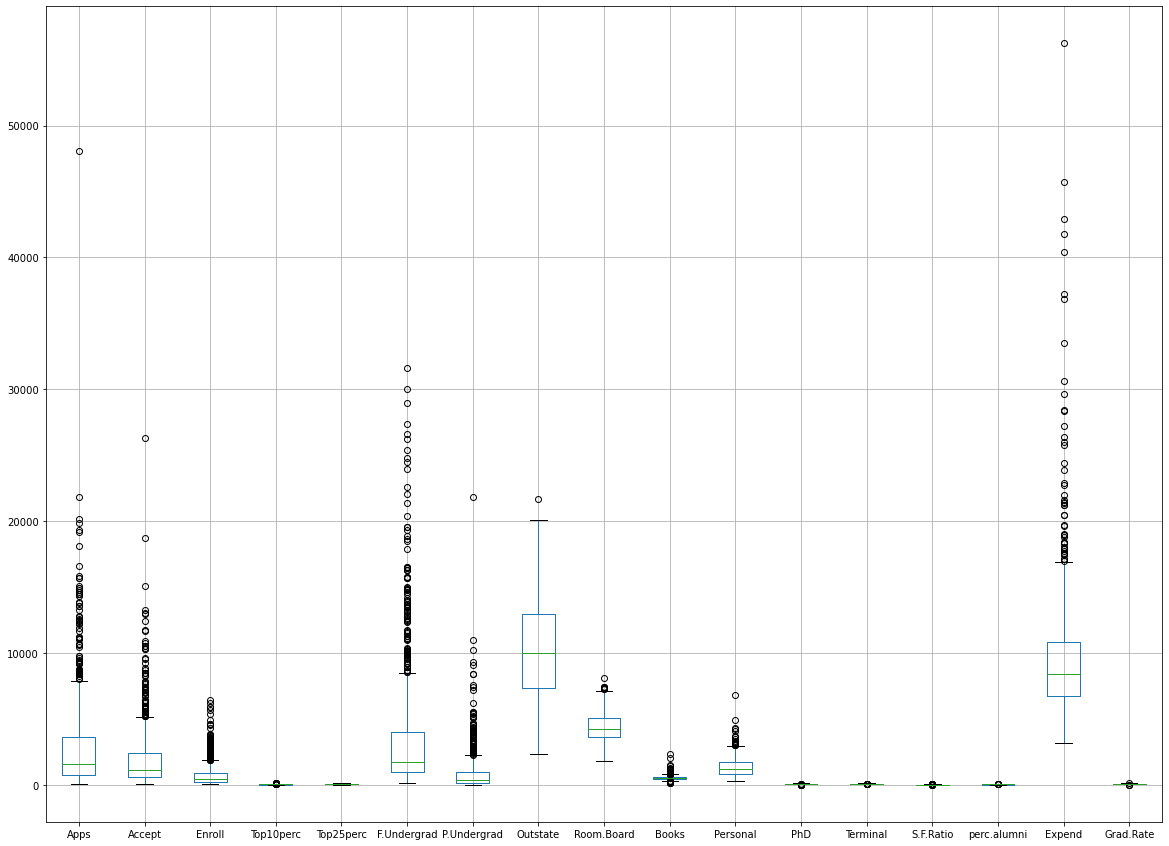

In [30]:
edu_data.boxplot(figsize=(20,15))

In [10]:
edu_data.columns

Index(['Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

<AxesSubplot:xlabel='Apps'>

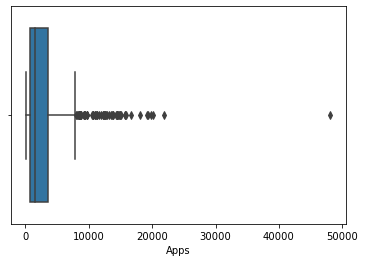

In [88]:
import seaborn as sns
sns.boxplot(data=edu_data,x=edu_data['Apps'])

In [95]:
print(edu_data.quantile(0.75) - edu_data.quantile(0.25))

Apps           2848.0
Accept         1820.0
Enroll          660.0
Top10perc        20.0
Top25perc        28.0
F.Undergrad    3013.0
P.Undergrad     872.0
Outstate       5605.0
Room.Board     1453.0
Books           130.0
Personal        850.0
PhD              23.0
Terminal         21.0
S.F.Ratio         5.0
perc.alumni      18.0
Expend         4079.0
Grad.Rate        25.0
dtype: float64


In [96]:
### Outlier treatment using z-score
from scipy import stats
import numpy as np
edu_data = edu_data.drop(['Names'], axis = 1) 
z = np.abs(stats.zscore(edu_data))
print(z)

[[3.46881819e-01 3.21205453e-01 6.35089011e-02 ... 8.67574189e-01
  5.01910084e-01 3.18251941e-01]
 [2.10884040e-01 3.87029908e-02 2.88584214e-01 ... 5.44572203e-01
  1.66109850e-01 5.51261842e-01]
 [4.06865631e-01 3.76317928e-01 4.78121319e-01 ... 5.85934748e-01
  1.77289956e-01 6.67766793e-01]
 ...
 [2.33895071e-01 4.23771558e-02 9.15087008e-02 ... 2.21570217e-01
  2.56241250e-01 9.59029170e-01]
 [1.99171118e+00 1.77256262e-01 5.78332661e-01 ... 2.12019418e+00
  5.88797079e+00 1.95359460e+00]
 [3.26765760e-03 6.68715889e-02 9.58163623e-02 ... 4.24433755e-01
  9.87115613e-01 1.95359460e+00]]


In [98]:
print(np.where(z > 3))


(array([  1,  16,  16,  20,  23,  23,  23,  23,  37,  59,  59,  59,  60,
        63,  69,  69,  70,  85,  86,  95,  95, 100, 100, 106, 144, 158,
       158, 174, 174, 191, 201, 203, 222, 223, 223, 226, 226, 242, 250,
       250, 251, 264, 274, 274, 274, 274, 275, 277, 284, 311, 317, 354,
       354, 363, 366, 366, 366, 366, 368, 368, 368, 412, 418, 424, 424,
       430, 445, 445, 445, 446, 459, 459, 461, 461, 461, 461, 471, 483,
       483, 483, 483, 494, 497, 506, 510, 513, 513, 562, 562, 573, 581,
       581, 581, 585, 605, 605, 605, 606, 606, 606, 607, 609, 614, 619,
       619, 620, 623, 623, 623, 623, 626, 628, 633, 633, 634, 634, 637,
       637, 637, 637, 640, 644, 663, 663, 669, 676, 684, 685, 685, 685,
       685, 686, 687, 687, 690, 691, 693, 694, 700, 700, 700, 700, 701,
       711, 713, 713, 713, 713, 720, 728, 735, 737, 739, 762, 763, 763,
       775, 775], dtype=int64), array([12,  3, 14, 15,  1,  2,  5,  6,  8,  0,  1,  2,  9,  9,  2,  5,  3,
       11, 14, 11, 16,  9, 1

NameError: name 'Q1' is not defined

In [99]:
Q1 = edu_data.quantile(0.25)
Q3 = edu_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Apps           2848.0
Accept         1820.0
Enroll          660.0
Top10perc        20.0
Top25perc        28.0
F.Undergrad    3013.0
P.Undergrad     872.0
Outstate       5605.0
Room.Board     1453.0
Books           130.0
Personal        850.0
PhD              23.0
Terminal         21.0
S.F.Ratio         5.0
perc.alumni      18.0
Expend         4079.0
Grad.Rate        25.0
dtype: float64


In [100]:
print(edu_data < (Q1 - 1.5 * IQR)) |(edu_data > (Q3 + 1.5 * IQR))

      Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0    False   False   False      False      False        False        False   
1    False   False   False      False      False        False        False   
2    False   False   False      False      False        False        False   
3    False   False   False      False      False        False        False   
4    False   False   False      False      False        False        False   
..     ...     ...     ...        ...        ...          ...          ...   
772  False   False   False      False      False        False        False   
773  False   False   False      False      False        False        False   
774  False   False   False      False      False        False        False   
775  False   False   False      False      False        False        False   
776  False   False   False      False      False        False        False   

     Outstate  Room.Board  Books  Personal    PhD  Terminal  S.

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [102]:
edu_data = edu_data[(z < 3).all(axis=1)]
edu_data.shape

ValueError: Item wrong length 777 instead of 682.

In [103]:
edu_data_outliers = edu_data[~((edu_data < (Q1 - 1.5 * IQR)) |(edu_data > (Q3 + 1.5 * IQR))).any(axis=1)]
edu_data_outliers.shape

(539, 17)

<AxesSubplot:xlabel='Apps'>

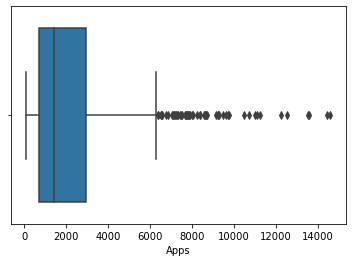

In [107]:
import seaborn as sns
sns.boxplot(data=edu_data,x=edu_data['Apps'])

In [129]:
Q1=edu_data['Apps'].quantile(0.25)
Q3=edu_data['Apps'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['Apps'] = np.where(edu_data['Apps'] <Q1, Lower_Whisker,edu_data['Apps'])
edu_data['Apps'] = np.where(edu_data['Apps'] >Q3, Upper_Whisker,edu_data['Apps'])
Q1=edu_data['Accept'].quantile(0.25)
Q3=edu_data['Accept'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['Accept'] = np.where(edu_data['Accept'] <Q1, Lower_Whisker,edu_data['Accept'])
edu_data['Accept'] = np.where(edu_data['Accept'] >Q3, Upper_Whisker,edu_data['Accept'])
Q1=edu_data['Enroll'].quantile(0.25)
Q3=edu_data['Enroll'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['Enroll'] = np.where(edu_data['Enroll'] <Q1, Lower_Whisker,edu_data['Enroll'])
edu_data['Enroll'] = np.where(edu_data['Enroll'] >Q3, Upper_Whisker,edu_data['Enroll'])
Q1=edu_data['Top10perc'].quantile(0.25)
Q3=edu_data['Top10perc'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['Top10perc'] = np.where(edu_data['Top10perc'] <Q1, Lower_Whisker,edu_data['Top10perc'])
edu_data['Top10perc'] = np.where(edu_data['Top10perc'] >Q3, Upper_Whisker,edu_data['Top10perc'])
Q1=edu_data['Top25perc'].quantile(0.25)
Q3=edu_data['Top25perc'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['Top25perc'] = np.where(edu_data['Top25perc'] <Q1, Lower_Whisker,edu_data['Top25perc'])
edu_data['Top25perc'] = np.where(edu_data['Top25perc'] >Q3, Upper_Whisker,edu_data['Top25perc'])
Q1=edu_data['F.Undergrad'].quantile(0.25)
Q3=edu_data['F.Undergrad'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['F.Undergrad'] = np.where(edu_data['F.Undergrad'] <Q1, Lower_Whisker,edu_data['F.Undergrad'])
edu_data['F.Undergrad'] = np.where(edu_data['F.Undergrad'] >Q3, Upper_Whisker,edu_data['F.Undergrad'])
Q1=edu_data['P.Undergrad'].quantile(0.25)
Q3=edu_data['P.Undergrad'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['P.Undergrad'] = np.where(edu_data['P.Undergrad'] <Q1, Lower_Whisker,edu_data['P.Undergrad'])
edu_data['P.Undergrad'] = np.where(edu_data['P.Undergrad'] >Q3, Upper_Whisker,edu_data['P.Undergrad'])
Q1=edu_data['Outstate'].quantile(0.25)
Q3=edu_data['Outstate'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['Outstate'] = np.where(edu_data['Outstate'] <Q1, Lower_Whisker,edu_data['Outstate'])
edu_data['Outstate'] = np.where(edu_data['Outstate'] >Q3, Upper_Whisker,edu_data['Outstate'])
Q1=edu_data['Room.Board'].quantile(0.25)
Q3=edu_data['Room.Board'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['Room.Board'] = np.where(edu_data['Room.Board'] <Q1, Lower_Whisker,edu_data['Room.Board'])
edu_data['Room.Board'] = np.where(edu_data['Room.Board'] >Q3, Upper_Whisker,edu_data['Room.Board'])
Q1=edu_data['Books'].quantile(0.25)
Q3=edu_data['Books'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['Books'] = np.where(edu_data['Books'] <Q1, Lower_Whisker,edu_data['Books'])
edu_data['Books'] = np.where(edu_data['Books'] >Q3, Upper_Whisker,edu_data['Books'])
Q1=edu_data['Personal'].quantile(0.25)
Q3=edu_data['Personal'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['Personal'] = np.where(edu_data['Personal'] <Q1, Lower_Whisker,edu_data['Personal'])
edu_data['Personal'] = np.where(edu_data['Personal'] >Q3, Upper_Whisker,edu_data['Personal'])
Q1=edu_data['PhD'].quantile(0.25)
Q3=edu_data['PhD'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['PhD'] = np.where(edu_data['PhD'] <Q1, Lower_Whisker,edu_data['PhD'])
edu_data['PhD'] = np.where(edu_data['PhD'] >Q3, Upper_Whisker,edu_data['PhD'])
Q1=edu_data['Terminal'].quantile(0.25)
Q3=edu_data['Terminal'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['Terminal'] = np.where(edu_data['Terminal'] <Q1, Lower_Whisker,edu_data['Terminal'])
edu_data['Terminal'] = np.where(edu_data['Terminal'] >Q3, Upper_Whisker,edu_data['Terminal'])
Q1=edu_data['S.F.Ratio'].quantile(0.25)
Q3=edu_data['S.F.Ratio'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['S.F.Ratio'] = np.where(edu_data['S.F.Ratio'] <Q1, Lower_Whisker,edu_data['S.F.Ratio'])
edu_data['S.F.Ratio'] = np.where(edu_data['S.F.Ratio'] >Q3, Upper_Whisker,edu_data['S.F.Ratio'])
Q1=edu_data['perc.alumni'].quantile(0.25)
Q3=edu_data['perc.alumni'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['perc.alumni'] = np.where(edu_data['perc.alumni'] <Q1, Lower_Whisker,edu_data['perc.alumni'])
edu_data['perc.alumni'] = np.where(edu_data['perc.alumni'] >Q3, Upper_Whisker,edu_data['perc.alumni'])
Q1=edu_data['Expend'].quantile(0.25)
Q3=edu_data['Expend'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['Expend'] = np.where(edu_data['Expend'] <Q1, Lower_Whisker,edu_data['Expend'])
edu_data['Expend'] = np.where(edu_data['Expend'] >Q3, Upper_Whisker,edu_data['Expend'])
Q1=edu_data['Grad.Rate'].quantile(0.25)
Q3=edu_data['Grad.Rate'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
edu_data['Grad.Rate'] = np.where(edu_data['Grad.Rate'] <Q1, Lower_Whisker,edu_data['Grad.Rate'])
edu_data['Grad.Rate'] = np.where(edu_data['Grad.Rate'] >Q3, Upper_Whisker,edu_data['Grad.Rate'])

<AxesSubplot:>

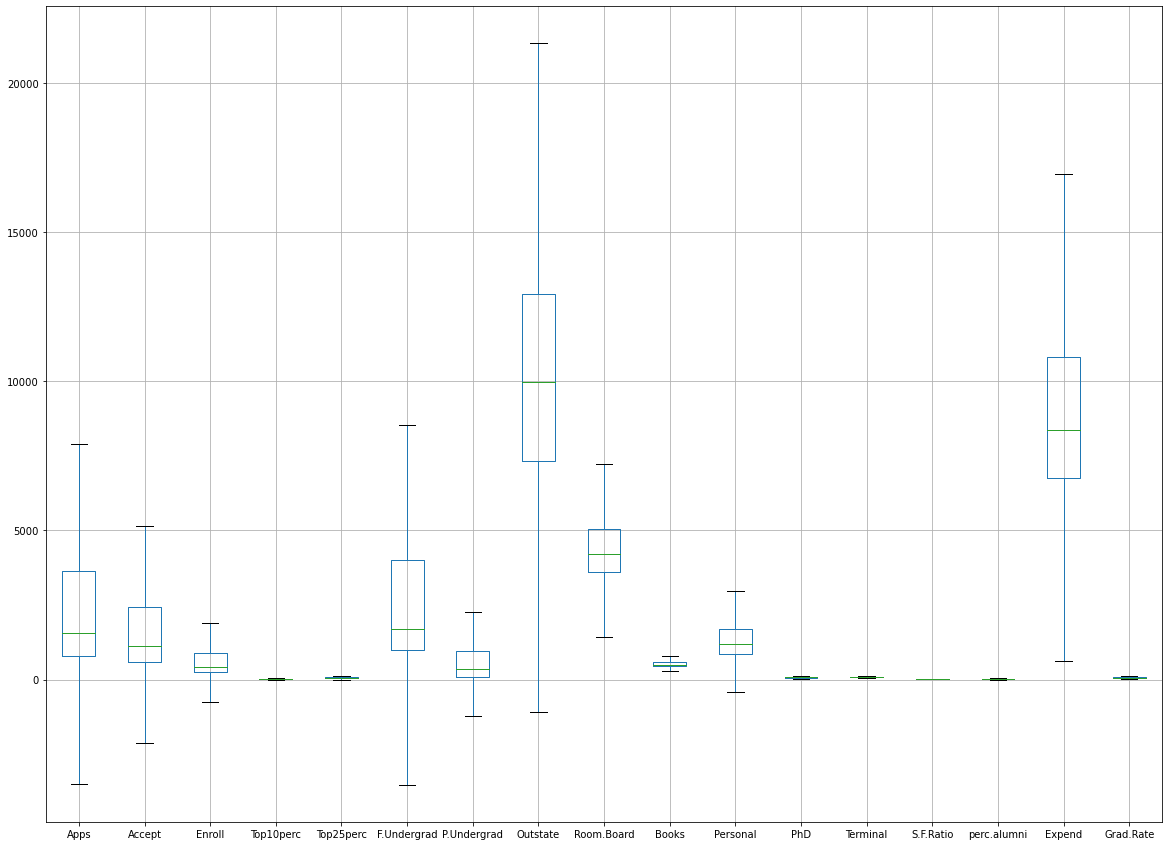

In [128]:
edu_data.boxplot(figsize=(20,15)) # As we can see no outliers

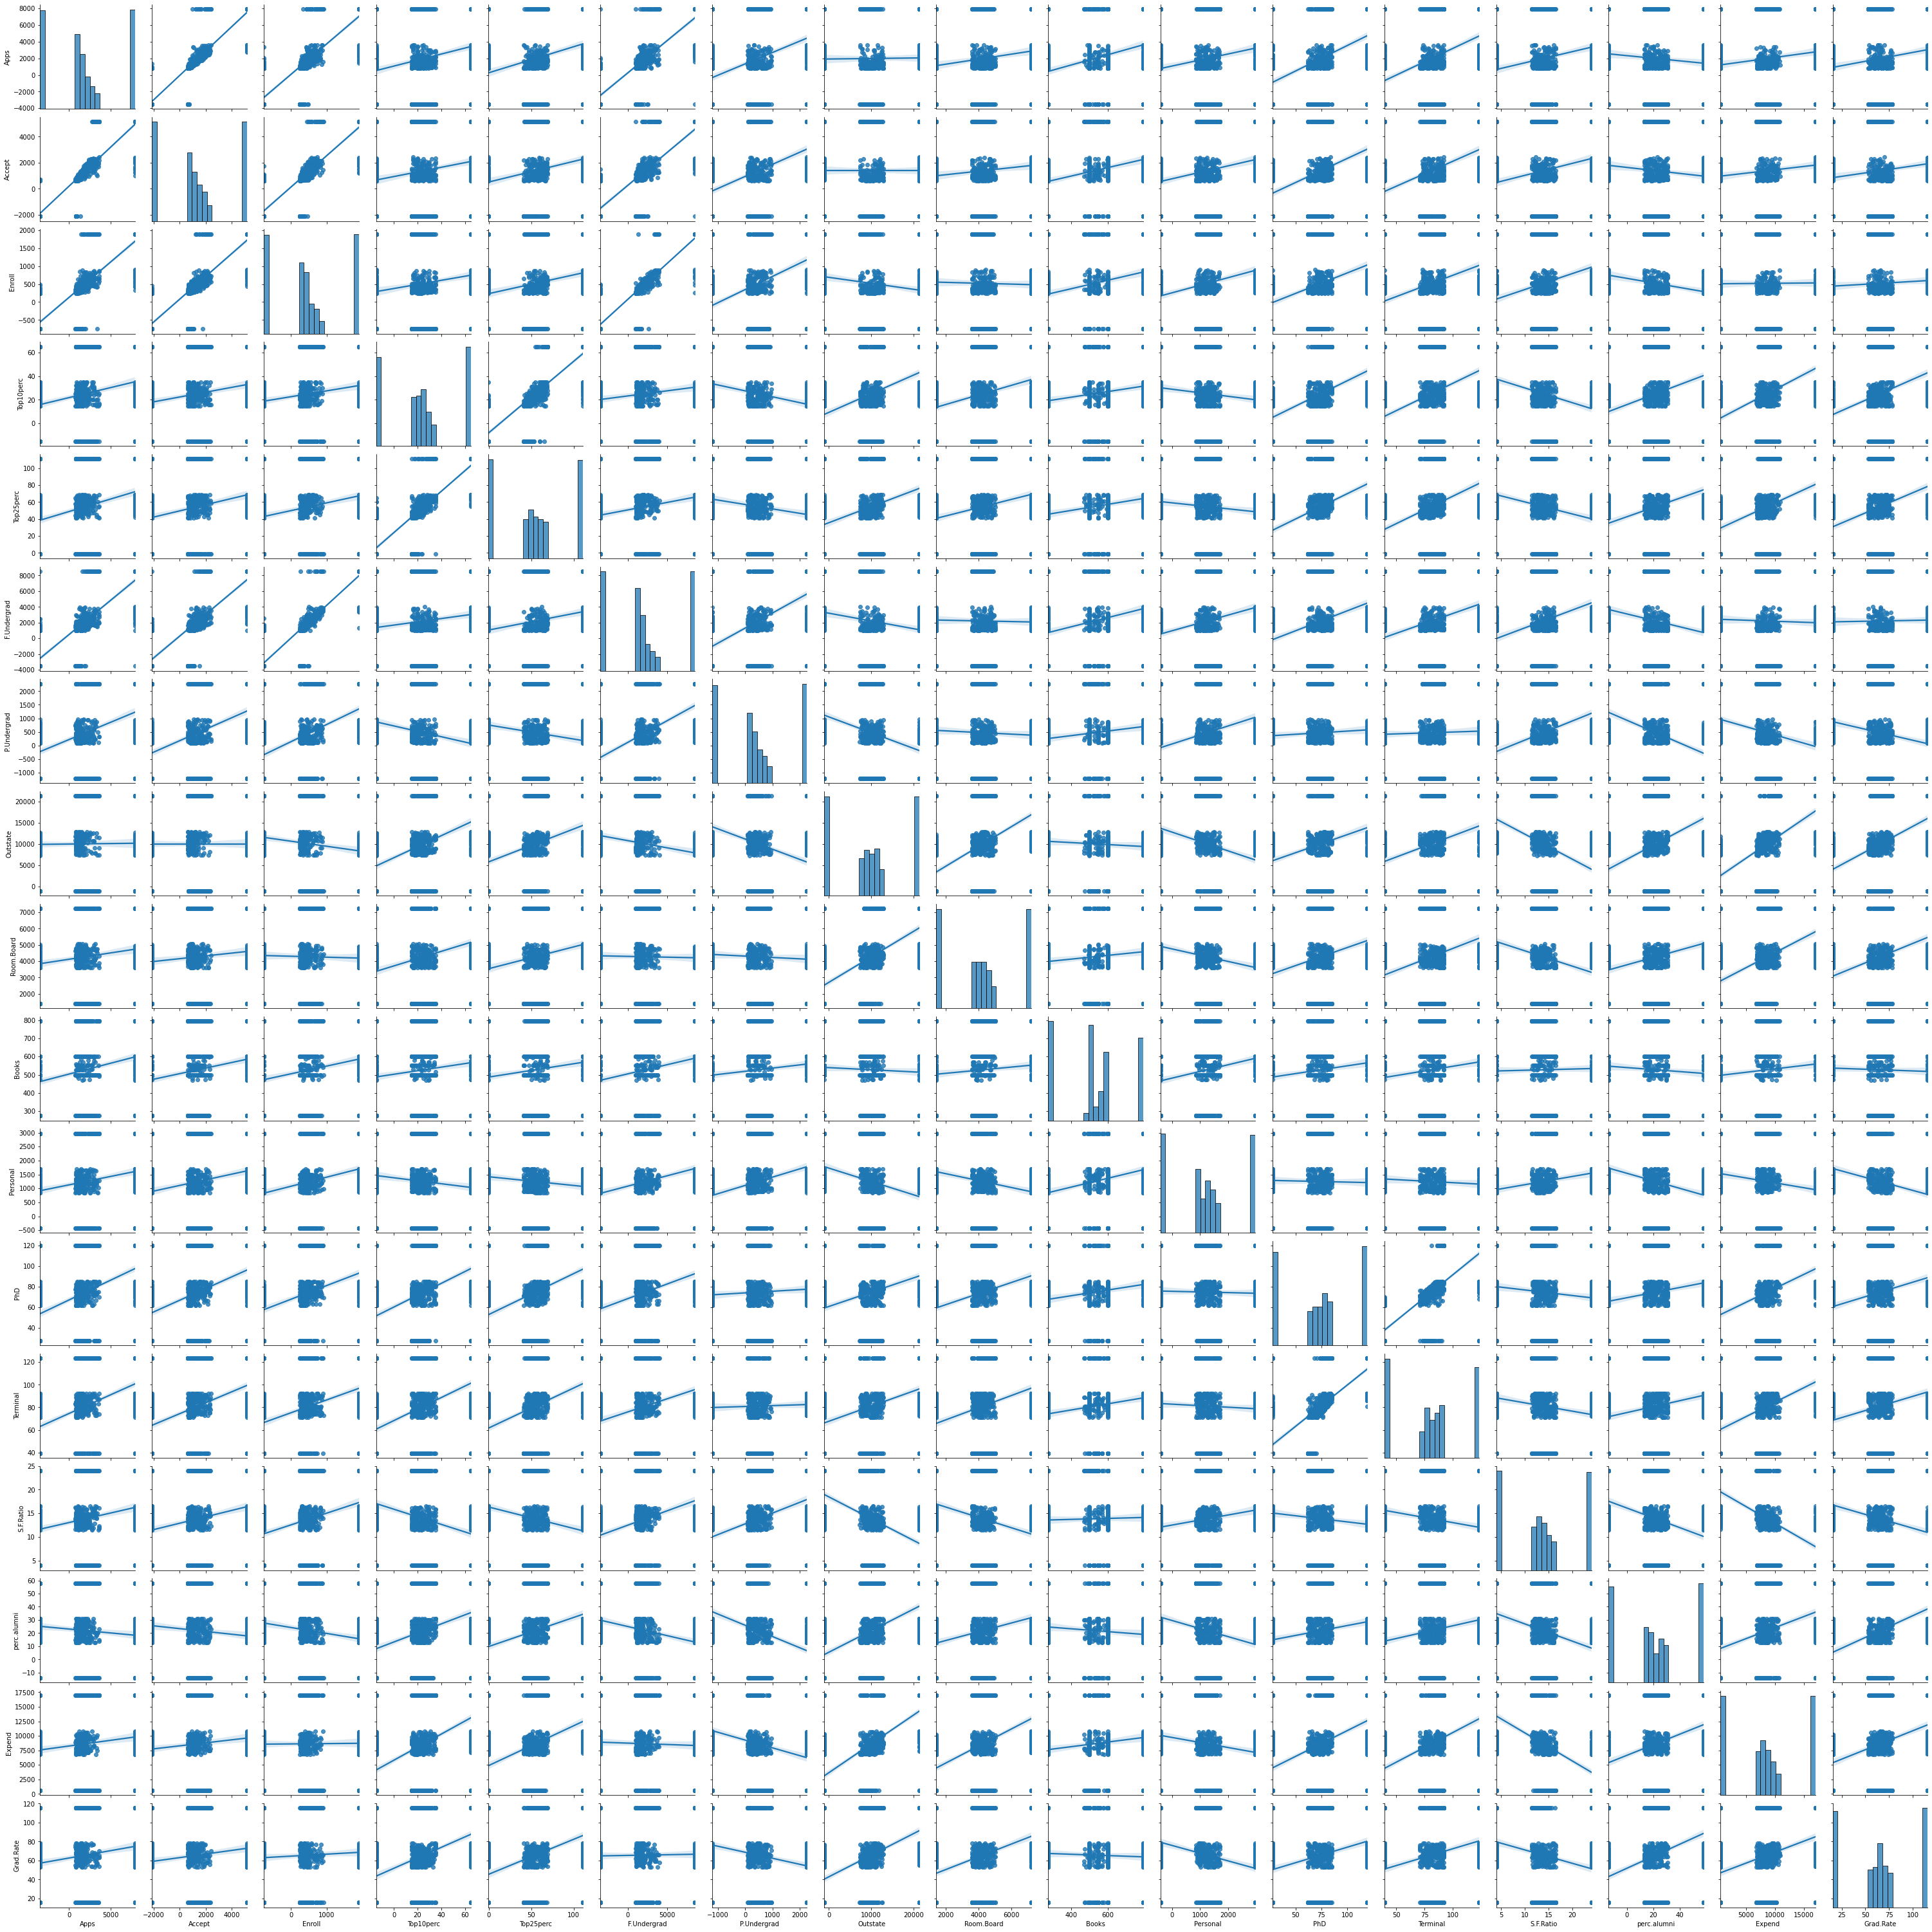

In [131]:
import seaborn as sns

sns.pairplot(edu_data, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

#### 2.2) Scale the variables and write the inference for using the type of scaling function for this case study.

In [67]:
from sklearn.preprocessing import MinMaxScaler

edu_data['Scaled_Apps'] = MinMaxScaler().fit_transform(edu_data[['Apps']])
edu_data['Scaled_Accept'] = MinMaxScaler().fit_transform(edu_data[['Accept']])
edu_data['Scaled_Enroll'] = MinMaxScaler().fit_transform(edu_data[['Enroll']])
edu_data['Scaled_Top10perc'] = MinMaxScaler().fit_transform(edu_data[['Top10perc']])
edu_data['Scaled_Top25perc'] = MinMaxScaler().fit_transform(edu_data[['Top25perc']])
edu_data['Scaled_F.Undergrad'] = MinMaxScaler().fit_transform(edu_data[['F.Undergrad']])
edu_data['Scaled_P.Undergrad'] = MinMaxScaler().fit_transform(edu_data[['P.Undergrad']])
edu_data['Scaled_Outstate'] = MinMaxScaler().fit_transform(edu_data[['Outstate']])
edu_data['Scaled_Room.Board'] = MinMaxScaler().fit_transform(edu_data[['Room.Board']])
edu_data['Scaled_Books'] = MinMaxScaler().fit_transform(edu_data[['Books']])
edu_data['Scaled_Personal'] = MinMaxScaler().fit_transform(edu_data[['Personal']])
edu_data['Scaled_PhD'] = MinMaxScaler().fit_transform(edu_data[['PhD']])
edu_data['Scaled_Terminal'] = MinMaxScaler().fit_transform(edu_data[['Terminal']])
edu_data['Scaled_S.F.Ratio'] = MinMaxScaler().fit_transform(edu_data[['S.F.Ratio']])
edu_data['Scaled_perc.alumni'] = MinMaxScaler().fit_transform(edu_data[['perc.alumni']])
edu_data['Scaled_Expend'] = MinMaxScaler().fit_transform(edu_data[['Expend']])
edu_data['Scaled_Grad.Rate'] = MinMaxScaler().fit_transform(edu_data[['Grad.Rate']])

#### 2.3) Comment on the comparison between covariance and the correlation matrix after scaling

In [68]:
edu_data_scaled = pd.DataFrame({
'Scaled_Apps': edu_data['Scaled_Apps'] ,
'Scaled_Accept': edu_data['Scaled_Accept'] ,
'Scaled_Enroll': edu_data['Scaled_Enroll'] ,
'Scaled_Top10perc': edu_data['Scaled_Top10perc'] ,
'Scaled_Top25perc': edu_data['Scaled_Top25perc'] ,
'Scaled_F.Undergrad': edu_data['Scaled_F.Undergrad'] ,
'Scaled_P.Undergrad': edu_data['Scaled_P.Undergrad'] ,
'Scaled_Outstate': edu_data['Scaled_Outstate'] ,
'Scaled_Room.Board': edu_data['Scaled_Room.Board'] ,
'Scaled_Books': edu_data['Scaled_Books'] ,
'Scaled_Personal': edu_data['Scaled_Personal'] ,
'Scaled_PhD': edu_data['Scaled_PhD'] ,
'Scaled_Terminal': edu_data['Scaled_Terminal'] ,
'Scaled_S.F.Ratio': edu_data['Scaled_S.F.Ratio'] ,
'Scaled_perc.alumni': edu_data['Scaled_perc.alumni'] ,
'Scaled_Expend': edu_data['Scaled_Expend'] ,
'Scaled_Grad.Rate': edu_data['Scaled_Grad.Rate'] })
edu_data_scaled

Scaled_Apps  Scaled_Accept  Scaled_Enroll  Scaled_Top10perc  \
0       0.032887       0.044177       0.107913          0.231579   
1       0.043842       0.070531       0.075035          0.157895   
2       0.028055       0.039036       0.047349          0.221053   
3       0.006998       0.010549       0.016045          0.621053   
4       0.002333       0.002818       0.003146          0.157895   
..           ...            ...            ...               ...   
772     0.044071       0.054955       0.079912          0.031579   
773     0.039114       0.065999       0.103823          0.242105   
774     0.041989       0.070188       0.103823          0.347368   
775     0.221273       0.090677       0.201667          0.989474   
776     0.060567       0.067903       0.103193          0.284211   

     Scaled_Top25perc  Scaled_F.Undergrad  Scaled_P.Undergrad  \
0            0.472527            0.087164            0.024548   
1            0.219780            0.080752            0.056148   
2            0.450549            0.028473            0.004488   
3            0.879121            0.011776            0.002839   
4            0.384615            0.003492            0.039753   
..                ...                 ...                 ...   
772          0.186813            0.093639            0.092878   
773          0.417582            0.086021            0.050653   
774          0.571429            0.084243            0.007557   
775          0.989011            0.161186            0.003755   
776          0.593407            0.090433            0.079002   

     Scaled_Outstate  Scaled_Room.Board  Scaled_Books  Scaled_Personal  \
0           0.263430           0.239596      0.157754         0.297710   
1           0.513430           0.736129      0.291444         0.190840   
2           0.460227           0.310530      0.135472         0.139695   
3           0.548554           0.578499      0.157754         0.095420   
4           0.269628           0.368852      0.313725         0.190840   
..               ...                ...           ...              ...   
772         0.230217           0.334174      0.180036         0.145038   
773         0.474174           0.501261      0.224599         0.152672   
774         0.235537           0.381463      0.232175         0.081069   
775         0.903926           0.745586      0.237968         0.284733   
776         0.136880           0.280580      0.180036         0.152672   

     Scaled_PhD  Scaled_Terminal  Scaled_S.F.Ratio  Scaled_perc.alumni  \
0      0.652632         0.710526          0.418231            0.187500   
1      0.221053         0.078947          0.260054            0.250000   
2      0.473684         0.552632          0.278820            0.468750   
3      0.884211         0.960526          0.139410            0.578125   
4      0.715789         0.631579          0.252011            0.031250   
..          ...              ...               ...                 ...   
772    0.547368         0.473684          0.495979            0.218750   
773    0.684211         0.671053          0.289544            0.484375   
774    0.621053         0.671053          0.319035            0.312500   
775    0.926316         0.947368          0.088472            0.765625   
776    0.705263         0.671053          0.418231            0.437500   

     Scaled_Expend  Scaled_Grad.Rate  
0         0.072671          0.462963  
1         0.138387          0.425926  
2         0.104605          0.407407  
3         0.298415          0.453704  
4         0.145833          0.046296  
..             ...               ...  
772       0.024186          0.277778  
773       0.113164          0.675926  
774       0.096839          0.361111  
775       0.701265          0.824074  
776       0.024940          0.824074  

[777 rows x 17 columns]

In [69]:
edu_data = edu_data.drop(['Scaled_Apps', 'Scaled_Accept','Scaled_Enroll','Scaled_Top10perc','Scaled_Top25perc','Scaled_F.Undergrad',
'Scaled_P.Undergrad','Scaled_Outstate','Scaled_Room.Board','Scaled_Books','Scaled_Personal','Scaled_PhD','Scaled_Terminal',
'Scaled_S.F.Ratio','Scaled_perc.alumni','Scaled_Expend','Scaled_Grad.Rate'], axis = 1) 
edu_data

Names   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University   1660    1232     721         23   
1                Adelphi University   2186    1924     512         16   
2                    Adrian College   1428    1097     336         22   
3               Agnes Scott College    417     349     137         60   
4         Alaska Pacific University    193     146      55         16   
..                              ...    ...     ...     ...        ...   
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0           52         2885          537      7440        3300    450   
1           29         2683         1227     12280        6450    750   
2           50         1036           99     11250        3750    400   
3           89          510           63     12960        5450    450   
4           44          249          869      7560        4120    800   
..         ...          ...          ...       ...         ...    ...   
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        2200   70        78       18.1           12    7041         60  
1        1500   29        30       12.2           16   10527         56  
2        1165   53        66       12.9           30    8735         54  
3         875   92        97        7.7           37   19016         59  
4        1500   76        72       11.9            2   10922         15  
..        ...  ...       ...        ...          ...     ...        ...  
772      1200   60        60       21.0           14    4469         40  
773      1250   73        75       13.3           31    9189         83  
774       781   67        75       14.4           20    8323         49  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99  

[777 rows x 18 columns]

In [70]:
edu_data.cov().T

Apps        Accept        Enroll     Top10perc  \
Apps         1.497846e+07  8.949860e+06  3.045256e+06  23132.773138   
Accept       8.949860e+06  6.007960e+06  2.076268e+06   8321.124872   
Enroll       3.045256e+06  2.076268e+06  8.633684e+05   2971.583415   
Top10perc    2.313277e+04  8.321125e+03  2.971583e+03    311.182456   
Top25perc    2.695266e+04  1.201340e+04  4.172592e+03    311.630480   
F.Undergrad  1.528970e+07  1.039358e+07  4.347530e+06  12089.113681   
P.Undergrad  2.346620e+06  1.646670e+06  7.257907e+05  -2829.474981   
Outstate     7.809704e+05 -2.539623e+05 -5.811885e+05  39907.179832   
Room.Board   7.000729e+05  2.443471e+05 -4.099706e+04   7186.705605   
Books        8.470375e+04  4.594281e+04  1.729120e+04    346.177405   
Personal     4.683468e+05  3.335566e+05  1.767380e+05  -1114.551186   
PhD          2.468943e+04  1.423820e+04  5.028961e+03    153.184870   
Terminal     2.105307e+04  1.218209e+04  4.217086e+03    127.551581   
S.F.Ratio    1.465061e+03  1.709838e+03  8.726848e+02    -26.874525   
perc.alumni -4.327122e+03 -4.859487e+03 -2.081694e+03     99.567208   
Expend       5.246171e+06  1.596272e+06  3.113454e+05  60879.310196   
Grad.Rate    9.756422e+03  2.834163e+03 -3.565880e+02    149.992164   

                Top25perc   F.Undergrad   P.Undergrad      Outstate  \
Apps         26952.663479  1.528970e+07  2.346620e+06  7.809704e+05   
Accept       12013.404757  1.039358e+07  1.646670e+06 -2.539623e+05   
Enroll        4172.592435  4.347530e+06  7.257907e+05 -5.811885e+05   
Top10perc      311.630480  1.208911e+04 -2.829475e+03  3.990718e+04   
Top25perc      392.229216  1.915895e+04 -1.615412e+03  3.899243e+04   
F.Undergrad  19158.952782  2.352658e+07  4.212910e+06 -4.209843e+06   
P.Undergrad  -1615.412144  4.212910e+06  2.317799e+06 -1.552704e+06   
Outstate     38992.427500 -4.209843e+06 -1.552704e+06  1.618466e+07   
Room.Board    7199.903568 -3.664582e+05 -1.023919e+05  2.886597e+06   
Books          377.759266  9.253576e+04  2.041045e+04  2.580824e+04   
Personal     -1083.605065  1.041709e+06  3.297324e+05 -8.146737e+05   
PhD            176.518449  2.521178e+04  3.706756e+03  2.515752e+04   
Terminal       153.002612  2.142424e+04  3.180597e+03  2.416415e+04   
S.F.Ratio      -23.097199  5.370209e+03  1.401303e+03 -8.835254e+03   
perc.alumni    102.550946 -1.379193e+04 -5.297337e+03  2.822955e+04   
Expend       54546.483305  4.724040e+05 -6.643512e+05  1.413324e+07   
Grad.Rate      162.371398 -6.563308e+03 -6.721062e+03  3.947968e+04   

               Room.Board         Books      Personal           PhD  \
Apps         7.000729e+05  84703.752639  4.683468e+05  24689.433666   
Accept       2.443471e+05  45942.807867  3.335566e+05  14238.201489   
Enroll      -4.099706e+04  17291.199742  1.767380e+05   5028.961166   
Top10perc    7.186706e+03    346.177405 -1.114551e+03    153.184870   
Top25perc    7.199904e+03    377.759266 -1.083605e+03    176.518449   
F.Undergrad -3.664582e+05  92535.764728  1.041709e+06  25211.784197   
P.Undergrad -1.023919e+05  20410.446674  3.297324e+05   3706.756219   
Outstate     2.886597e+06  25808.242145 -8.146737e+05  25157.515051   
Room.Board   1.202743e+06  23170.313390 -1.480838e+05   5895.034749   
Books        2.317031e+04  27259.779946  2.004303e+04     72.534242   
Personal    -1.480838e+05  20043.025650  4.584258e+05   -120.898783   
PhD          5.895035e+03     72.534242 -1.208988e+02    266.608636   
Terminal     6.047300e+03    242.963918 -3.051542e+02    204.231332   
S.F.Ratio   -1.574206e+03    -20.867207  3.654158e+02     -8.436492   
perc.alumni  3.701431e+03    -82.263132 -2.399311e+03     50.383230   
Expend       2.873308e+06  96912.580326 -3.460978e+05  36898.058233   
Grad.Rate    8.005360e+03      3.008837 -3.132615e+03     85.557109   

                 Terminal     S.F.Ratio   perc.alumni        Expend  \
Apps         21053.067602   1465.060576  -4327.122381  5.246171e+06   
Accept       12182.093828   1709.838189  -

In [71]:
edu_data.corr().T

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

In [72]:
edu_data_scaled.cov().T

Scaled_Apps  Scaled_Accept  Scaled_Enroll  \
Scaled_Apps            0.006498       0.007099       0.009977   
Scaled_Accept          0.007099       0.008714       0.012439   
Scaled_Enroll          0.009977       0.012439       0.021364   
Scaled_Top10perc       0.005072       0.003336       0.004921   
Scaled_Top25perc       0.006169       0.005028       0.007213   
Scaled_F.Undergrad     0.010108       0.012564       0.021708   
Scaled_P.Undergrad     0.002238       0.002872       0.005229   
Scaled_Outstate        0.000840      -0.000500      -0.004722   
Scaled_Room.Board      0.002298       0.001467      -0.001017   
Scaled_Books           0.000786       0.000780       0.001212   
Scaled_Personal        0.001489       0.001939       0.004245   
Scaled_PhD             0.005413       0.005708       0.008327   
Scaled_Terminal        0.005770       0.006104       0.008729   
Scaled_S.F.Ratio       0.000818       0.001746       0.003680   
Scaled_perc.alumni    -0.001408      -0.002892      -0.005117   
Scaled_Expend          0.002060       0.001146       0.000923   
Scaled_Grad.Rate       0.001882       0.000999      -0.000519   

                    Scaled_Top10perc  Scaled_Top25perc  Scaled_F.Undergrad  \
Scaled_Apps                 0.005072          0.006169            0.010108   
Scaled_Accept               0.003336          0.005028            0.012564   
Scaled_Enroll               0.004921          0.007213            0.021708   
Scaled_Top10perc            0.034480          0.036047            0.004039   
Scaled_Top25perc            0.036047          0.047365            0.006683   
Scaled_F.Undergrad          0.004039          0.006683            0.023704   
Scaled_P.Undergrad         -0.001364         -0.000813            0.006124   
Scaled_Outstate             0.021698          0.022133           -0.006902   
Scaled_Room.Board           0.011925          0.012472           -0.001834   
Scaled_Books                0.001624          0.001850            0.001309   
Scaled_Personal            -0.001791         -0.001818            0.005048   
Scaled_PhD                  0.016973          0.020419            0.008424   
Scaled_Terminal             0.017666          0.022123            0.008948   
Scaled_S.F.Ratio           -0.007584         -0.006805            0.004570   
Scaled_perc.alumni          0.016376          0.017608           -0.006840   
Scaled_Expend               0.012081          0.011300            0.000283   
Scaled_Grad.Rate            0.014619          0.016521           -0.001929   

                    Scaled_P.Undergrad  Scaled_Outstate  Scaled_Room.Board  \
Scaled_Apps                   0.002238         0.000840           0.002298   
Scaled_Accept                 0.002872        -0.000500           0.001467   
Scaled_Enroll                 0.005229        -0.004722          -0.001017   
Scaled_Top10perc             -0.001364         0.021698           0.011925   
Scaled_Top25perc             -0.000813         0.022133           0.012472   
Scaled_F.Undergrad            0.006124        -0.006902          -0.001834   
Scaled_P.Undergrad            0.004861        -0.003673          -0.000739   
Scaled_Outstate              -0.003673         0.043181           0.023503   
Scaled_Room.Board            -0.000739         0.023503           0.029885   
Scaled_Books                  0.000417         0.000594           0.001628   
Scaled_Personal               0.002306        -0.006424          -0.003564   
Scaled_PhD                    0.001787         0.013679           0.009781   
Scaled_Terminal               0.001917         0.016423           0.012543   
Scaled_S.F.Ratio              0.001721        -0.012235          -0.006653   
Scaled_perc.alumni           -0.003791         0.022783           0.009116   
Scaled_Expend                -0.000574         0.013762           0.008538   
Scaled_Grad.Rate             -0.002850         0.018882           0.011684   

                    Scaled_Books  Scale

In [73]:
edu_data_scaled.corr().T

Scaled_Apps  Scaled_Accept  Scaled_Enroll  \
Scaled_Apps            1.000000       0.943451       0.846822   
Scaled_Accept          0.943451       1.000000       0.911637   
Scaled_Enroll          0.846822       0.911637       1.000000   
Scaled_Top10perc       0.338834       0.192447       0.181294   
Scaled_Top25perc       0.351640       0.247476       0.226745   
Scaled_F.Undergrad     0.814491       0.874223       0.964640   
Scaled_P.Undergrad     0.398264       0.441271       0.513069   
Scaled_Outstate        0.050159      -0.025755      -0.155477   
Scaled_Room.Board      0.164939       0.090899      -0.040232   
Scaled_Books           0.132559       0.113525       0.112711   
Scaled_Personal        0.178731       0.200989       0.280929   
Scaled_PhD             0.390697       0.355758       0.331469   
Scaled_Terminal        0.369491       0.337583       0.308274   
Scaled_S.F.Ratio       0.095633       0.176229       0.237271   
Scaled_perc.alumni    -0.090226      -0.159990      -0.180794   
Scaled_Expend          0.259592       0.124717       0.064169   
Scaled_Grad.Rate       0.146755       0.067313      -0.022341   

                    Scaled_Top10perc  Scaled_Top25perc  Scaled_F.Undergrad  \
Scaled_Apps                 0.338834          0.351640            0.814491   
Scaled_Accept               0.192447          0.247476            0.874223   
Scaled_Enroll               0.181294          0.226745            0.964640   
Scaled_Top10perc            1.000000          0.891995            0.141289   
Scaled_Top25perc            0.891995          1.000000            0.199445   
Scaled_F.Undergrad          0.141289          0.199445            1.000000   
Scaled_P.Undergrad         -0.105356         -0.053577            0.570512   
Scaled_Outstate             0.562331          0.489394           -0.215742   
Scaled_Room.Board           0.371480          0.331490           -0.068890   
Scaled_Books                0.118858          0.115527            0.115550   
Scaled_Personal            -0.093316         -0.080810            0.317200   
Scaled_PhD                  0.531828          0.545862            0.318337   
Scaled_Terminal             0.491135          0.524749            0.300019   
Scaled_S.F.Ratio           -0.384875         -0.294629            0.279703   
Scaled_perc.alumni          0.455485          0.417864           -0.229462   
Scaled_Expend               0.660913          0.527447            0.018652   
Scaled_Grad.Rate            0.494989          0.477281           -0.078773   

                    Scaled_P.Undergrad  Scaled_Outstate  Scaled_Room.Board  \
Scaled_Apps                   0.398264         0.050159           0.164939   
Scaled_Accept                 0.441271        -0.025755           0.090899   
Scaled_Enroll                 0.513069        -0.155477          -0.040232   
Scaled_Top10perc             -0.105356         0.562331           0.371480   
Scaled_Top25perc             -0.053577         0.489394           0.331490   
Scaled_F.Undergrad            0.570512        -0.215742          -0.068890   
Scaled_P.Undergrad            1.000000        -0.253512          -0.061326   
Scaled_Outstate              -0.253512         1.000000           0.654256   
Scaled_Room.Board            -0.061326         0.654256           1.000000   
Scaled_Books                  0.081200         0.038855           0.127963   
Scaled_Personal               0.319882        -0.299087          -0.199428   
Scaled_PhD                    0.149114         0.382982           0.329202   
Scaled_Terminal               0.141904         0.407983           0.374540   
Scaled_S.F.Ratio              0.232531        -0.554821          -0.362628   
Scaled_perc.alumni           -0.280792         0.566262           0.272363   
Scaled_Expend                -0.083568         0.672779           0.501739   
Scaled_Grad.Rate             -0.257001         0.571290           0.424942   

                    Scaled_Books  Scale

#### 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

<AxesSubplot:>

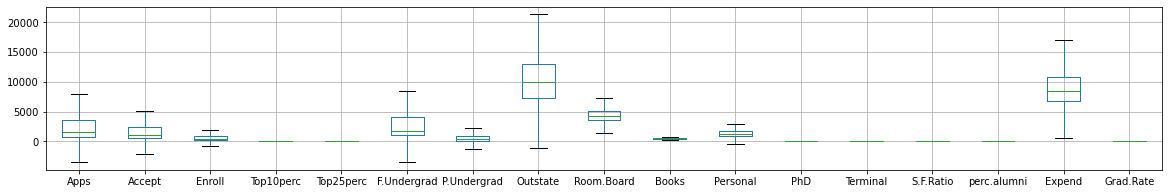

In [132]:
edu_data.boxplot(figsize=(20,3))

<AxesSubplot:>

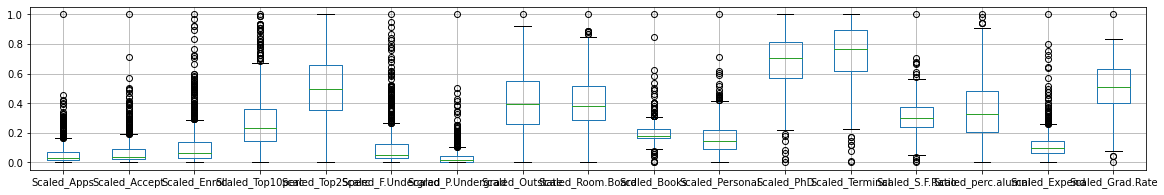

In [133]:
edu_data_scaled.boxplot(figsize=(20,3))

#### 2.5) Build the covariance matrix and calculate the eigenvalues and the eigenvector.

In [134]:
cov_matrix = np.cov(edu_data_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 6.49754752e-03  7.09897662e-03  9.97729358e-03  5.07160301e-03
   6.16881085e-03  1.01082155e-02  2.23836423e-03  8.40176158e-04
   2.29837681e-03  7.86178125e-04  1.48924944e-03  5.41288350e-03
   5.76956340e-03  8.18065179e-04 -1.40818710e-03  2.05978922e-03
   1.88151620e-03]
 [ 7.09897662e-03  8.71372245e-03  1.24385428e-02  3.33577531e-03
   5.02762727e-03  1.25642891e-02  2.87204778e-03 -4.99576762e-04
   1.46683902e-03  7.79709881e-04  1.93939662e-03  5.70781496e-03
   6.10445229e-03  1.74575999e-03 -2.89167053e-03  1.14599927e-03
   9.99400154e-04]
 [ 9.97729358e-03  1.24385428e-02  2.13644503e-02  4.92053255e-03
   7.21294071e-03  2.17082426e-02  5.22884750e-03 -4.72236374e-03
  -1.01657007e-03  1.21213241e-03  4.24459590e-03  8.32726653e-03
   8.72864150e-03  3.68041130e-03 -5.11663763e-03  9.23271559e-04
  -5.19386586e-04]
 [ 5.07160301e-03  3.33577531e-03  4.92053255e-03  3.44800505e-02
   3.60474817e-02  4.03929114e-03 -1.36404613e-03  2.16981187e-

In [135]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 6.84622439e-02  2.13767089e-01  3.04972237e-03 -1.86732482e-01
   8.75794411e-02 -8.64946288e-03 -3.31441114e-02  4.85110244e-02
   6.45171674e-01 -2.63532465e-01 -6.38613800e-02  5.81812205e-01
  -1.89437570e-01 -1.80258214e-01  4.35902670e-02  7.04245678e-02
  -4.74278428e-03]
 [ 5.45226942e-02  2.67634316e-01  3.36326579e-02 -2.10569610e-01
   1.46921061e-01 -6.28667146e-03 -5.14109360e-02  9.18269071e-02
  -7.20814074e-01  3.69540234e-02 -1.00600486e-02  4.92142782e-01
  -1.52165425e-01 -2.39988072e-01 -4.44916040e-02 -2.35358564e-02
   2.64870698e-02]
 [ 5.95619427e-02  4.62062818e-01 -3.04373473e-02 -2.61365642e-01
   2.57790627e-01 -7.53531308e-02 -4.97284852e-02  8.13982545e-02
   2.15440433e-01  7.17976665e-01 -3.74691405e-02 -2.21509919e-01
   1.03488038e-01 -9.49438736e-02 -1.10437618e-02 -9.34664446e-03
   1.30424797e-02]
 [ 3.92335224e-01  4.82976775e-02 -3.86227996e-01 -3.74801619e-02
  -2.73994220e-01 -8.21348432e-02 -2.15340219e-02  9.56299177e-03
 

#### 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

#### 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

In [140]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 42.99732852  63.45220446  71.6721678   78.32291889  83.83041672
  87.54499916  90.19304051  92.51334235  94.25623065  95.69005771
  96.89092073  97.88286376  98.65957897  99.29648538  99.77058652
  99.94079976 100.        ]


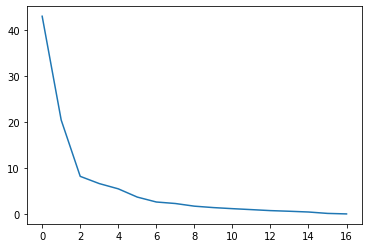

In [139]:
plt.plot(var_exp)

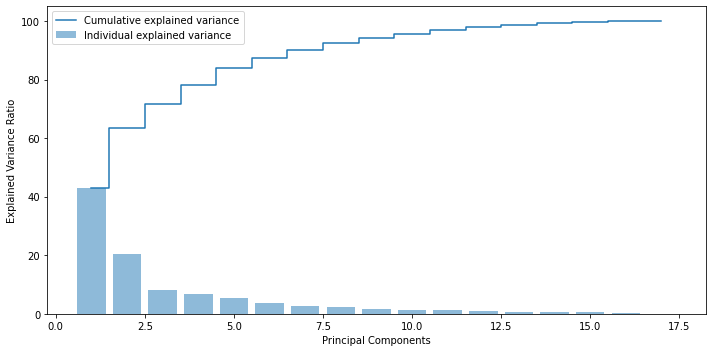

In [141]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### 2.8) Mention the business implication of using the Principal Component Analysis for this case study.